# LAB NPL

The purpose of todays lab is to calculate and validate the customer sentiment (polarity) based on reviews of purchased womens clothing, as an introduction to using NLP techniques on text data and retrieving actionable data insights per department / division at the womens clothing company.

https://github.com/student-IH-labs-and-stuff/BER-DAFT-MAR21/blob/main/Labs/NLPLab.md

data source: https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews

In [1]:
# import tools/libraries

import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

In [2]:
ls

LAB_NLP.ipynb                           Womens Clothing E-Commerce Reviews.csv*


In [3]:
# get data

data = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
data.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [5]:
# filter data to subset

data = data[['Title', 'Review Text', 'Rating', 'Department Name', 'Class Name']]
data.head()

,Title,Review Text,Rating,Department Name,Class Name
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,Intimate,Intimates
1,NaN,Love this dress! it's sooo pretty. i happene...,5,Dresses,Dresses
2,Some major design flaws,I had such high hopes for this dress and reall...,3,Dresses,Dresses
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,Bottoms,Pants
4,Flattering shirt,This shirt is very flattering to all due to th...,5,Tops,Blouses


In [6]:
# standatdize columns names

data.columns = data.columns.str.lower()
data.head()

,title,review text,rating,department name,class name
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,Intimate,Intimates
1,NaN,Love this dress! it's sooo pretty. i happene...,5,Dresses,Dresses
2,Some major design flaws,I had such high hopes for this dress and reall...,3,Dresses,Dresses
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,Bottoms,Pants
4,Flattering shirt,This shirt is very flattering to all due to th...,5,Tops,Blouses


### EDA

In [7]:
# checking shape

data.shape

# we have 23.486 reviews and 5 features

(23486, 5)

In [8]:
# looking at all the features

data.info()

# apart from 'rating' the other features have null values
# title is missing most often

# most features are categorical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            19676 non-null  object
 1   review text      22641 non-null  object
 2   rating           23486 non-null  int64 
 3   department name  23472 non-null  object
 4   class name       23472 non-null  object
dtypes: int64(1), object(4)
memory usage: 917.5+ KB


In [9]:
# checking overall info

data.describe()

# we only have 1 numeric feature - rating
# we have a rating for each review
# the range of rating is 1-5
# most of the ratings are around 4

,rating
count,23486.000000
mean,4.196032
std,1.110031
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [10]:
# checking the unique values per feature

for feature in data.columns.tolist():       # know the number of unique values for each column
    print(feature, len(data[feature].unique()))
    
# as suspected the title and review feature is very unique
# rating has values from 1-5
# as of now it looks like there are 7 departments and 21 classes

title 13994
review text 22635
rating 5
department name 7
class name 21


In [11]:
# lets investigate further to see if we have typos in these unique values

data['department name'].unique()

# no doubles with different writing
# NAN is a bit anoying, need to check how much this is contributing to the total

array(['Intimate', 'Dresses', 'Bottoms', 'Tops', 'Jackets', 'Trend', nan],
      dtype=object)

In [12]:
data['class name'].unique()

# I dont know what fine gauge is
# you could argue to group pants,legwear, jeans, casual bottoms together
# but no typos so far

array(['Intimates', 'Dresses', 'Pants', 'Blouses', 'Knits', 'Outerwear',
       'Lounge', 'Sweaters', 'Skirts', 'Fine gauge', 'Sleep', 'Jackets',
       'Swim', 'Trend', 'Jeans', 'Legwear', 'Shorts', 'Layering',
       'Casual bottoms', nan, 'Chemises'], dtype=object)

Frequency analysis of column:  department name
Frequency analysis of column:  class name


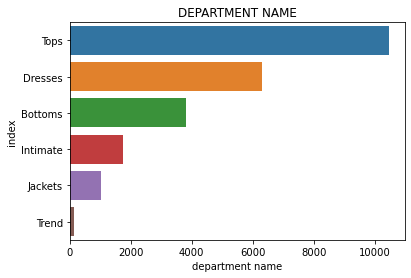

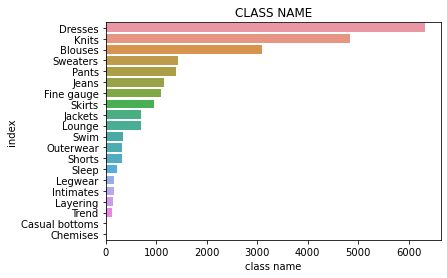

<Figure size 432x288 with 0 Axes>

In [13]:
# visualization - cat features

# for title and review it is not sensible to check the frequency as they should be individual
import seaborn as sns

data_cat = list(data[['department name', 'class name']])

for col in data_cat:
    print("Frequency analysis of column: ",col)
    my_data = data[col].value_counts().reset_index()
    ax = sns.barplot(x=col, y="index", data = my_data).set_title(col.upper())
    plt.figure()
    print

In [14]:
# we can see that there are the most reviews for department tops, followed by dresses and bottems
# if we look at classes the most reviews are allocated to dresses and knits

# it will be interesting to see if the reviews are more positive or negative for those cats

<AxesSubplot:>

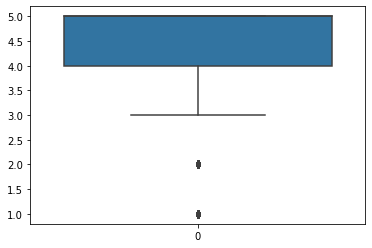

In [15]:
# visualization - num features

# a boxplot for the ratings is sensible

sns.boxplot(data=data['rating'])

# there seem to be 2 outliers, one at 1 and another one at 2
# the lower whisker it at 3
# the lower quartile is at 4 25% of the ratings are between 3-4
# the upper quartile at 5 75% of the ratings are between 4-5
# we can see that there is no upper whisker

In [16]:
# grouping ratings by division and class in new df

data_ratings_specific1 = data.groupby('department name')['rating'].count()
data_ratings_specific1

department name
Bottoms      3799
Dresses      6319
Intimate     1735
Jackets      1032
Tops        10468
Trend         119
Name: rating, dtype: int64

In [17]:
# average rating per department per class

data_ratings_specific2 = data.groupby(['department name','class name'], as_index=False)['rating'].mean()
data_ratings_specific2

,department name,class name,rating
0,Bottoms,Casual bottoms,4.500000
1,Bottoms,Jeans,4.360942
2,Bottoms,Pants,4.265850
3,Bottoms,Shorts,4.255521
4,Bottoms,Skirts,4.245503
5,Dresses,Dresses,4.150815
6,Intimate,Chemises,4.000000
7,Intimate,Intimates,4.279221
8,Intimate,Layering,4.376712
9,Intimate,Legwear,4.278788


In [53]:
data_ratings_specific2.columns = ['department_name','class_name','rating']
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22641 entries, 0 to 23485
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            19675 non-null  object 
 1   review text      22641 non-null  object 
 2   rating           22641 non-null  int64  
 3   department name  22628 non-null  object 
 4   class name       22628 non-null  object 
 5   polarity         22641 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


<AxesSubplot:xlabel='rating', ylabel='class_name'>

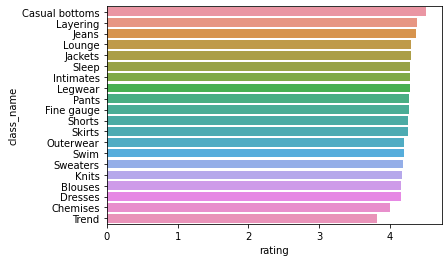

In [60]:
# visualizing avg rating per class

sns.barplot(x='rating', y='class_name', data = data_ratings_specific2, order =data_ratings_specific2.sort_values('rating', ascending=False).class_name)

In [19]:
# spot check of sentiment analysis for specific reviews

review_check1 = TextBlob(data.at[5, 'review text'])
review_check1.sentiment

# review is supposebly to be rather positive
# review is a little more subjective as objective

Sentiment(polarity=0.17874999999999996, subjectivity=0.533125)

In [20]:
data['review text'][5]

# sentiment analysis fits in my opinion

'I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress.'

In [21]:
review_check2 = TextBlob(data.at[567, 'review text'])
review_check2.sentiment

# review is supposebly to be quite positive
# review is also quite subjective

Sentiment(polarity=0.47145833333333337, subjectivity=0.6516666666666666)

In [22]:
data['review text'][567]

# sentiment analysis fits in my opinion

"I love , love this top !! it looks just like the picture on model. the front is a soft t-shirt and the back is so cute and flattering . super unique and comfortable style.!! i am 5'4 -105 and xs fits perfect."

In [23]:
review_check3 = TextBlob(data.at[5825, 'review text'])
review_check3.sentiment

# review is supposebly rather positive
# review is also more subjective then objective

Sentiment(polarity=0.21262896825396826, subjectivity=0.5483829365079365)

In [24]:
data['review text'][5825]

# sentiment analysis fits in my opinion

'I love these bottoms they are super cute, comfy and very flatering. finally a bikini botom i feel comfotable in after having my babies. its just high enough to cover my stretch marks on top and the ruffles cover the one down low :) and fits loosly enough to avoid a muffin top. i am normally between a size 8 and ten 145 lbs. and i ordered size large.'

In [25]:
# breaking out the text into sentences

review_check1.sentences

[Sentence("I love tracy reese dresses, but this one is not for the very petite."),
 Sentence("i am just under 5 feet tall and usually wear a 0p in this brand."),
 Sentence("this dress was very pretty out of the package but its a lot of dress."),
 Sentence("the skirt is long and very full so it overwhelmed my small frame."),
 Sentence("not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment."),
 Sentence("i love the color and the idea of the style but it just did not work on me."),
 Sentence("i returned this dress.")]

In [26]:
review_check2.sentences

[Sentence("I love , love this top !!"),
 Sentence("it looks just like the picture on model."),
 Sentence("the front is a soft t-shirt and the back is so cute and flattering ."),
 Sentence("super unique and comfortable style.!!"),
 Sentence("i am 5'4 -105 and xs fits perfect.")]

In [27]:
review_check3.sentences

[Sentence("I love these bottoms they are super cute, comfy and very flatering."),
 Sentence("finally a bikini botom i feel comfotable in after having my babies."),
 Sentence("its just high enough to cover my stretch marks on top and the ruffles cover the one down low :) and fits loosly enough to avoid a muffin top."),
 Sentence("i am normally between a size 8 and ten 145 lbs."),
 Sentence("and i ordered size large.")]

In [34]:
# dropping the rowns with no review

data = data.dropna(subset=['review text'])
data.shape

(22641, 5)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22641 entries, 0 to 23485
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            19675 non-null  object
 1   review text      22641 non-null  object
 2   rating           22641 non-null  int64 
 3   department name  22628 non-null  object
 4   class name       22628 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.0+ MB


In [36]:
# build function to apply sentiment to all rows

def sentiment(text):
    try: 
        return TextBlob(text).sentiment 
    except:
        return None

In [37]:
# new column for polarity in dataframe using sentiment function

data['polarity'] = data['review text'].apply(sentiment).apply(lambda x:x[0])
data.head()

2021-05-10 13:26:19,284 [23625] WARNING  py.warnings:109: [JupyterRequire] <ipython-input-37-8e2e8afa5f61>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['polarity'] = data['review text'].apply(sentiment).apply(lambda x:x[0])



,title,review text,rating,department name,class name,polarity
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,Intimate,Intimates,0.633333
1,NaN,Love this dress! it's sooo pretty. i happene...,5,Dresses,Dresses,0.339583
2,Some major design flaws,I had such high hopes for this dress and reall...,3,Dresses,Dresses,0.073675
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,Bottoms,Pants,0.550000
4,Flattering shirt,This shirt is very flattering to all due to th...,5,Tops,Blouses,0.512891


In [38]:
# grouping department and class by min review polarity

new_df = data.groupby(['department name','class name'], as_index=False)['polarity'].min()
new_df

,department name,class name,polarity
0,Bottoms,Casual bottoms,0.330000
1,Bottoms,Jeans,-0.533333
2,Bottoms,Pants,-0.447917
3,Bottoms,Shorts,-0.195000
4,Bottoms,Skirts,-0.266667
5,Dresses,Dresses,-0.916667
6,Intimate,Chemises,0.600000
7,Intimate,Intimates,-0.308333
8,Intimate,Layering,-0.090705
9,Intimate,Legwear,-0.230000


In [48]:
new_df.columns = ['department_name','class_name','polarity']

<AxesSubplot:xlabel='polarity', ylabel='class_name'>

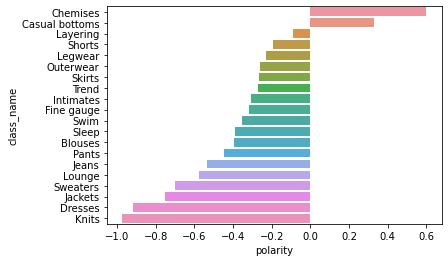

In [49]:
# visualizing

sns.barplot(x='polarity', y='class_name', data = new_df, order=new_df.sort_values('polarity', ascending=False).class_name)

In [61]:
# using the pandas groupby function again, summarise the average review polarity, by division and department as a new dataframe

new_df2 = data.groupby(['department name','class name'], as_index=False)['polarity'].mean()
new_df2

,department name,class name,polarity
0,Bottoms,Casual bottoms,0.330000
1,Bottoms,Jeans,0.251393
2,Bottoms,Pants,0.244833
3,Bottoms,Shorts,0.248430
4,Bottoms,Skirts,0.257670
5,Dresses,Dresses,0.249977
6,Intimate,Chemises,0.600000
7,Intimate,Intimates,0.263857
8,Intimate,Layering,0.256187
9,Intimate,Legwear,0.260167


In [63]:
new_df2.columns = ['department_name','class_name','polarity']

<AxesSubplot:xlabel='polarity', ylabel='class_name'>

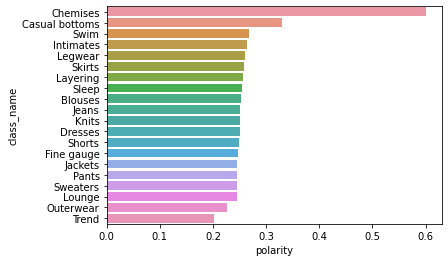

In [65]:
# visualizing

sns.barplot(x='polarity', y='class_name', data = new_df2, order=new_df2.sort_values('polarity', ascending=False).class_name)